In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Загрузка данных
train_df = pd.read_excel(r'/home/greciya/intensive_3/train.xlsx', parse_dates=['dt'])
test_df = pd.read_excel(r'/home/greciya/intensive_3/test.xlsx', parse_dates=['dt'])

train_df

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
...,...,...
395,2022-08-01,47500
396,2022-08-08,49000
397,2022-08-15,47500
398,2022-08-22,46500


In [11]:
train_df.info

<bound method DataFrame.info of             dt  Цена на арматуру
0   2015-01-05             32900
1   2015-01-12             32500
2   2015-01-19             32000
3   2015-01-26             30700
4   2015-02-02             30300
..         ...               ...
395 2022-08-01             47500
396 2022-08-08             49000
397 2022-08-15             47500
398 2022-08-22             46500
399 2022-08-29             46000

[400 rows x 2 columns]>

In [12]:
train_df.describe()

,dt,Цена на арматуру
count,400,400.000000
mean,2018-11-01 12:00:00,39229.475000
min,2015-01-05 00:00:00,21000.000000
25%,2016-12-03 06:00:00,31075.000000
50%,2018-11-01 12:00:00,35450.000000
75%,2020-09-29 18:00:00,42000.000000
max,2022-08-29 00:00:00,79000.000000
std,NaN,13407.979668


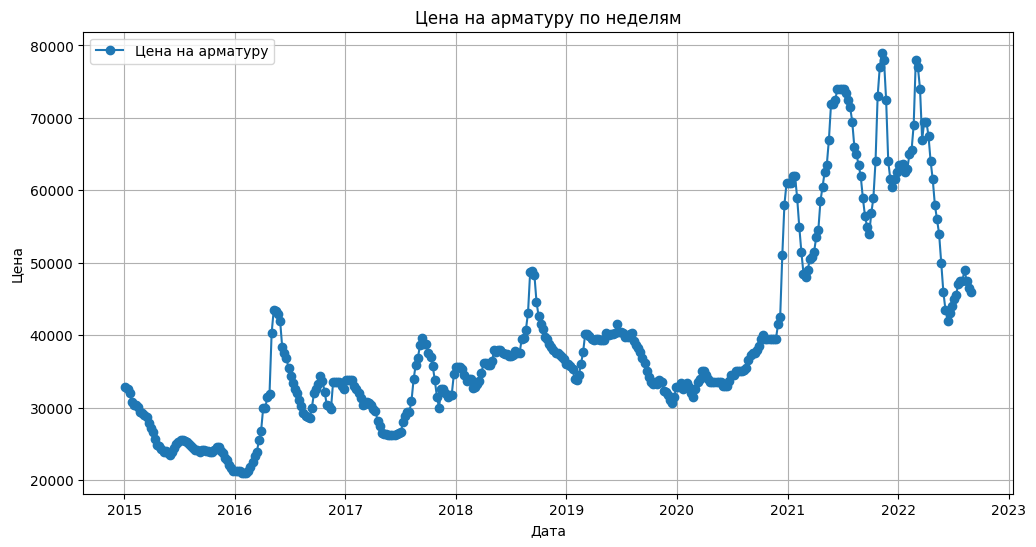

In [13]:
# Визуализация цен на арматуру
plt.figure(figsize=(12, 6))
plt.plot(train_df['dt'], train_df['Цена на арматуру'], label='Цена на арматуру', marker='o')
plt.title('Цена на арматуру по неделям')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid()
plt.show()


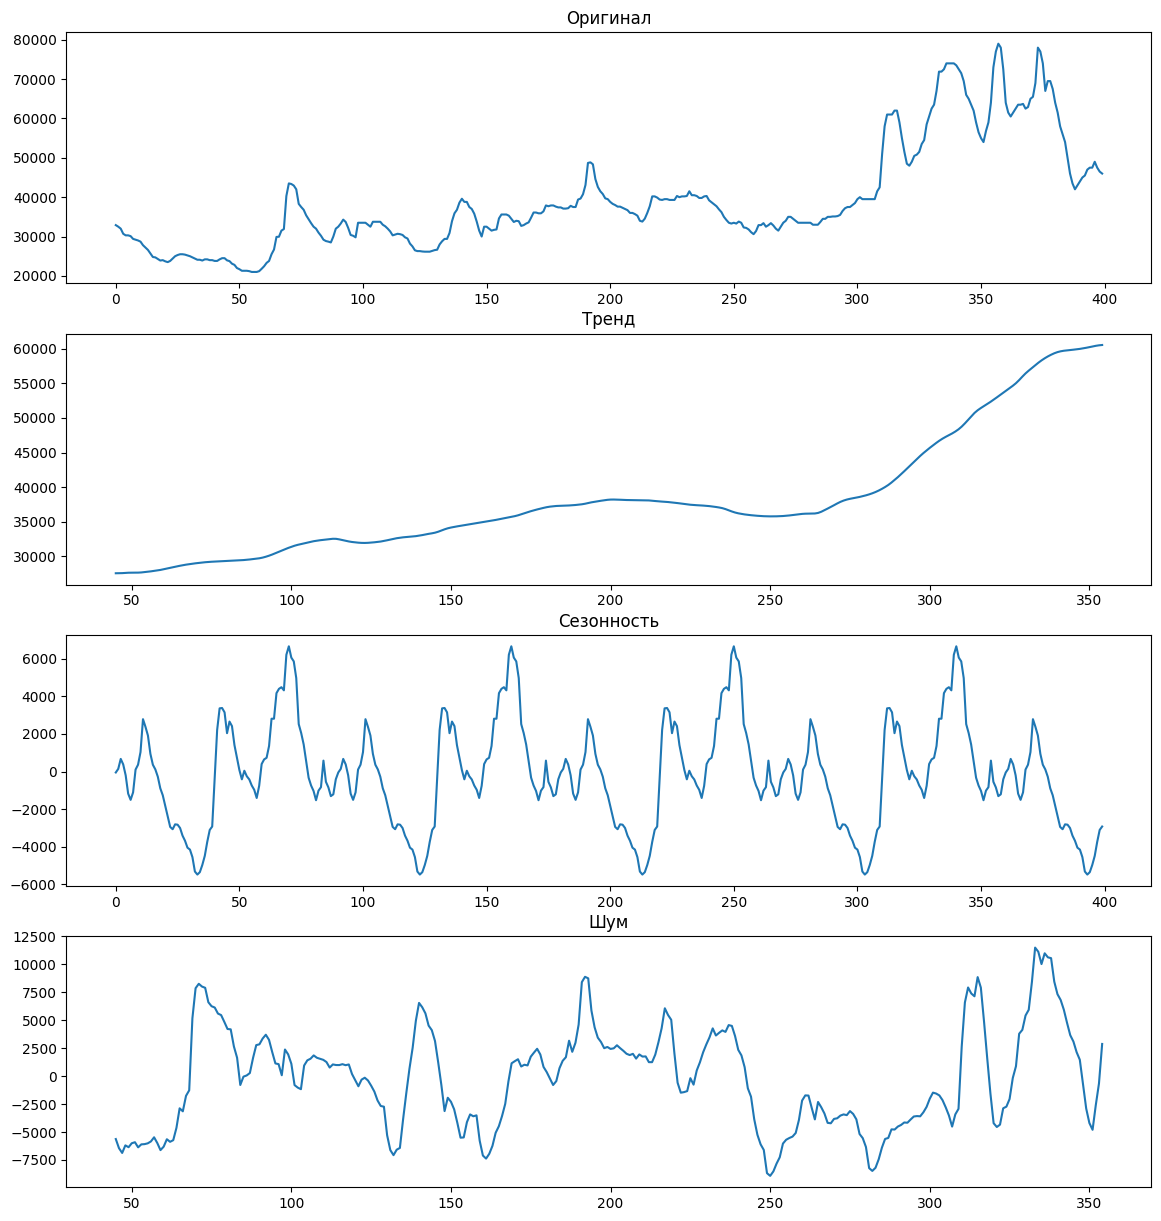

In [14]:
# Разложим ряд на компоненты и ответим: Есть ли у данного ряда тренд? Есть ли у данного ряда сезонность?
from statsmodels.tsa.seasonal import seasonal_decompose
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 15))
decompose = seasonal_decompose(train_df[['Цена на арматуру']], period=90)

ax[0].set_title('Оригинал')
ax[1].set_title('Тренд')
ax[2].set_title('Сезонность')
ax[3].set_title('Шум')

decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
decompose.resid.plot(ax=ax[3]);

In [15]:
from statsmodels.tsa.stattools import adfuller

# Функция для проверки стационарности
def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Ряд стационарен")
    else:
        print("Ряд нестационарен")

# Проверка исходного ряда на стационарность
check_stationarity(train_df['Цена на арматуру'])

ADF Statistic: -1.9258699893713453
p-value: 0.3199906102569917
Critical Values: {'1%': -3.4470566389664703, '5%': -2.8689037160476016, '10%': -2.570692663557422}
Ряд нестационарен


In [16]:
# Приведение ряда к стационарному с помощью дифференцирования
train_df['Цена на арматуру_diff'] = train_df['Цена на арматуру'].diff().dropna()

# Проверка стационарности после дифференцирования
check_stationarity(train_df['Цена на арматуру_diff'].dropna())

ADF Statistic: -7.7060615041152065
p-value: 1.3006938373810178e-11
Critical Values: {'1%': -3.447405233596701, '5%': -2.8690569369014605, '10%': -2.5707743450830893}
Ряд стационарен


0:	learn: 2.2192144	test: 2.7013951	best: 2.7013951 (0)	total: 1.01ms	remaining: 1.01s
100:	learn: 0.9564231	test: 3.0191686	best: 2.7013951 (0)	total: 78.1ms	remaining: 695ms
200:	learn: 0.5436017	test: 3.0321026	best: 2.7013951 (0)	total: 143ms	remaining: 569ms
300:	learn: 0.3689169	test: 3.0319789	best: 2.7013951 (0)	total: 206ms	remaining: 477ms
400:	learn: 0.2589385	test: 3.0448116	best: 2.7013951 (0)	total: 269ms	remaining: 402ms
500:	learn: 0.1954574	test: 3.0397971	best: 2.7013951 (0)	total: 332ms	remaining: 330ms
600:	learn: 0.1470988	test: 3.0351218	best: 2.7013951 (0)	total: 395ms	remaining: 262ms
700:	learn: 0.1068340	test: 3.0367986	best: 2.7013951 (0)	total: 457ms	remaining: 195ms
800:	learn: 0.0819902	test: 3.0363183	best: 2.7013951 (0)	total: 517ms	remaining: 128ms
900:	learn: 0.0632334	test: 3.0372000	best: 2.7013951 (0)	total: 578ms	remaining: 63.5ms
999:	learn: 0.0509315	test: 3.0367872	best: 2.7013951 (0)	total: 638ms	remaining: 0us

bestTest = 2.701395064
bestItera

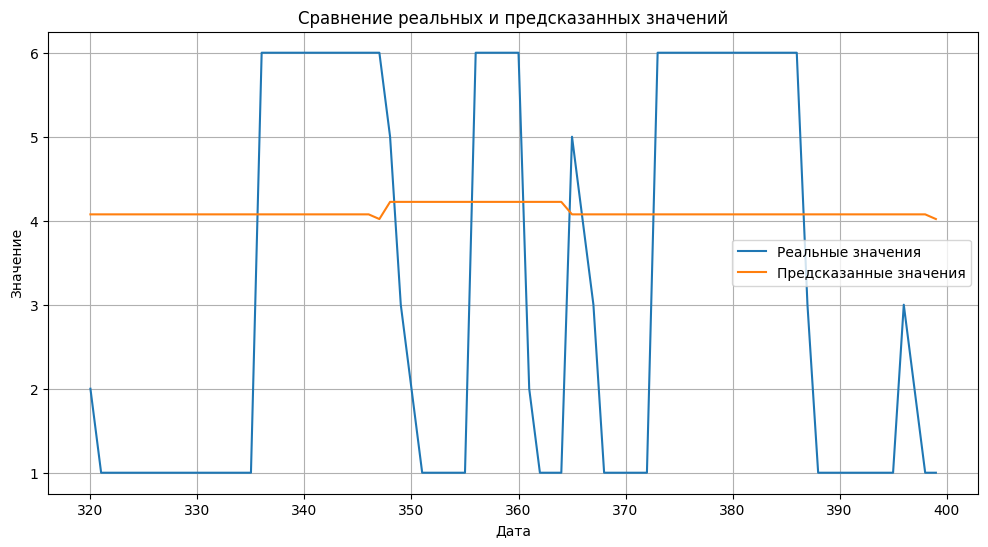

In [17]:
from catboost import CatBoostRegressor, CatBoostClassifier # Импорт CatBoost (и Regressor, и Classifier)
from sklearn.model_selection import train_test_split

# Генерация признаков
for lag in range(1, 5):
    train_df[f'lag_{lag}'] = train_df['Цена на арматуру'].shift(lag)

train_df['ma_3'] = train_df['Цена на арматуру'].rolling(3).mean()
train_df['ma_5'] = train_df['Цена на арматуру'].rolling(5).mean()
train_df['month'] = train_df['dt'].dt.month
train_df['week_of_year'] = train_df['dt'].dt.isocalendar().week

# Удаление строк с пропусками
train_df.dropna(inplace=True)

# Расчет оптимального N для каждой даты
def calculate_optimal_n(df):
    optimal_n = []
    for i in range(len(df)):
        max_saving = -np.inf
        best_n = 1
        current_price = df.iloc[i]['Цена на арматуру']
        for n in range(1, 7):
            if i + n >= len(df):
                break
            future_prices = df.iloc[i:i+n]['Цена на арматуру']
            saving = current_price * n - future_prices.sum()
            if saving > max_saving:
                max_saving = saving
                best_n = n
        optimal_n.append(best_n)
    return optimal_n

train_df['N'] = calculate_optimal_n(train_df)

# Разделение данных на признаки и целевую переменную
features = ['lag_1', 'lag_2', 'lag_3', 'lag_4', 'ma_3', 'ma_5', 'month', 'week_of_year']
X = train_df[features]
y = train_df['N']  # Замените 'N' на имя вашего целевого столбца

#Разделение данных на обучающую и тестовую выборки (включая test_df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Теперь разделяем X_train на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

# Обучение модели (CatBoostRegressor)
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=100, loss_function='RMSE')
model.fit(X_train, y_train, eval_set=(X_val, y_val))

# Прогнозирование на тестовых данных
y_pred = model.predict(X_test)

# Визуализация предсказанных и реальных значений
plt.figure(figsize=(12, 6))
plt.plot(X_test.index, y_test, label='Реальные значения')  # Используйте X_test.index
plt.plot(X_test.index, y_pred, label='Предсказанные значения')  # Используйте X_test.index
plt.title('Сравнение реальных и предсказанных значений')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()